In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import seaborn as sns
import catboost
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, plot_roc_curve, confusion_matrix, classification_report, precision_score

In [2]:
data = pd.read_csv("breast cancer data.csv")

In [3]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
data.shape

(569, 33)

In [5]:
data.isnull().values.any()

True

In [6]:
data.isnull().values.sum()

569

In [7]:
len(data.columns[data.isnull().values.any()])

C:\Users\ishan\AppData\Local\Temp\ipykernel_864\2188072842.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  len(data.columns[data.isnull().values.any()])


1

In [8]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [9]:
data = data.drop(columns = 'id')
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [10]:
dataset = pd.get_dummies(data, drop_first=True)
dataset = dataset.drop(columns='Unnamed: 32')

In [11]:
corr = dataset.corr()
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,-0.012838


<AxesSubplot:>

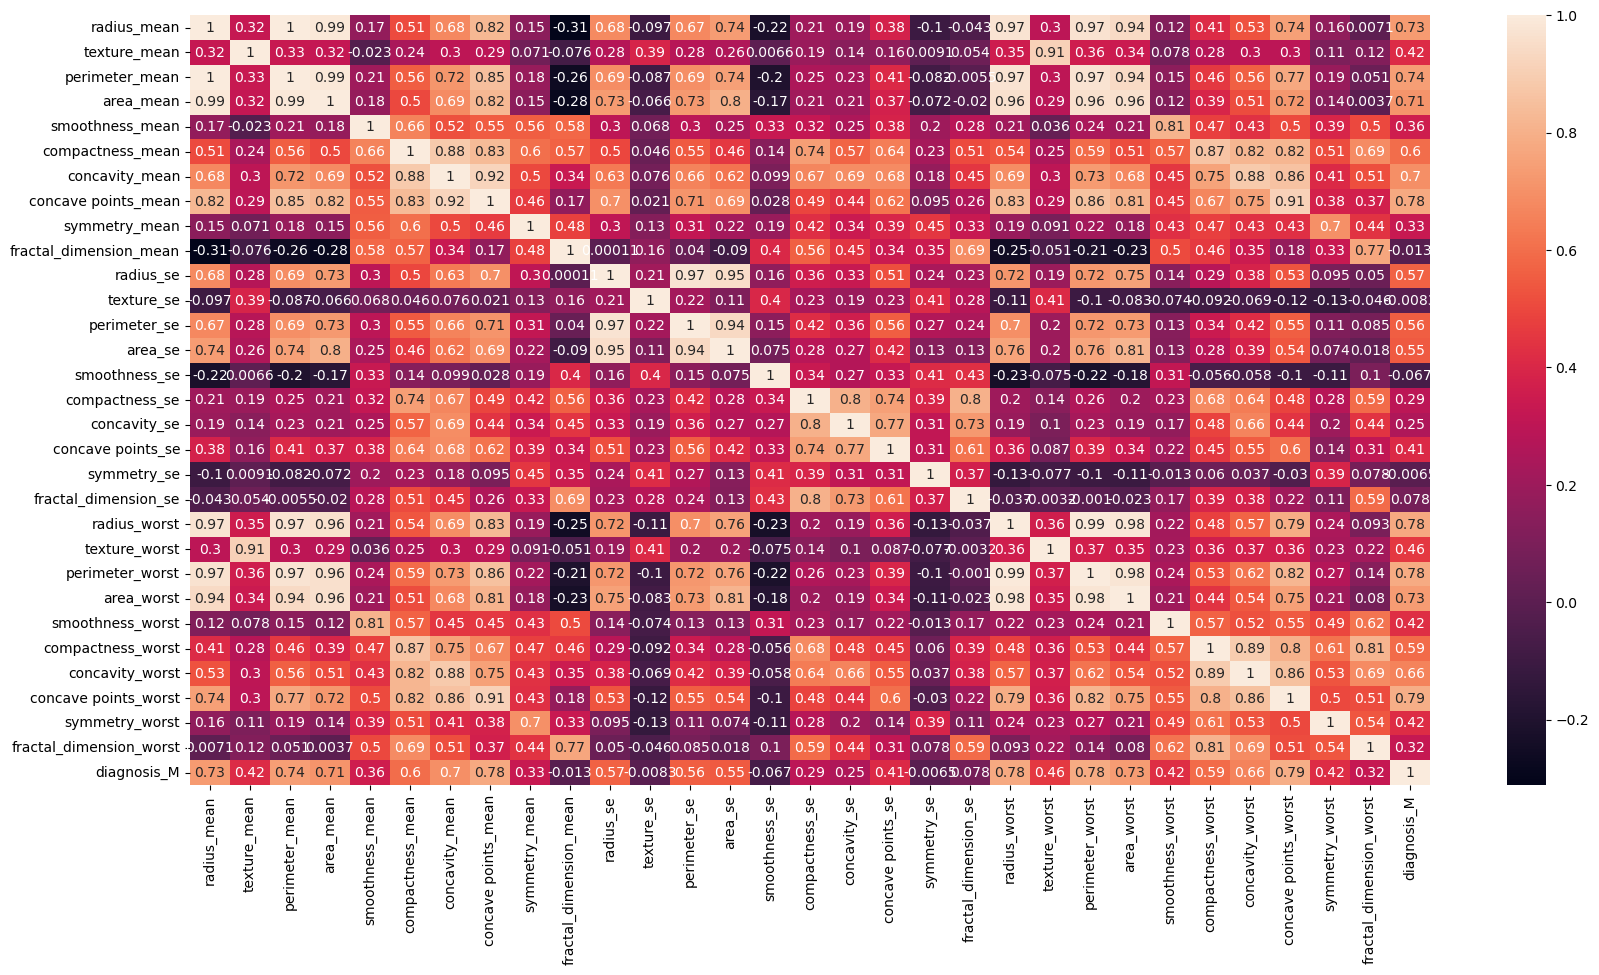

In [12]:
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True)

In [13]:
X = dataset.drop(columns='diagnosis_M')
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [14]:
dataset

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [15]:
Y = dataset["diagnosis_M"]
Y.shape

(569,)

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [17]:
 X_train.shape

(455, 30)

In [18]:
Y_train.shape

(455,)

In [19]:
clf = RandomForestClassifier()

In [20]:
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [21]:
Y_preds = clf.predict(X_test)

In [22]:
clf.score(X_test, Y_test)

0.956140350877193

In [23]:
precision_score(Y_test, Y_preds)

0.9523809523809523

In [24]:
grid = {'bootstrap': [True, False],
         'max_depth': [70, 80, 90, 100, None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_leaf': [1, 2, 4],
         'min_samples_split': [2, 5, 10],
         'n_estimators': [1000, 1200, 1400, 1600, 1800, 2000]}

In [25]:
gsv = GridSearchCV(clf, param_grid=grid, n_jobs=-1, cv=3, verbose=2)

In [26]:
from catboost import CatBoostClassifier

In [27]:
clf_2 = CatBoostClassifier()

In [28]:
clf_2.fit(X_train, Y_train)

Learning rate set to 0.00736
0:	learn: 0.6812589	total: 214ms	remaining: 3m 34s
1:	learn: 0.6692348	total: 229ms	remaining: 1m 54s
2:	learn: 0.6583753	total: 243ms	remaining: 1m 20s
3:	learn: 0.6481894	total: 257ms	remaining: 1m 3s
4:	learn: 0.6375033	total: 269ms	remaining: 53.5s
5:	learn: 0.6283885	total: 281ms	remaining: 46.6s
6:	learn: 0.6165743	total: 295ms	remaining: 41.8s
7:	learn: 0.6064453	total: 307ms	remaining: 38s
8:	learn: 0.5955410	total: 319ms	remaining: 35.1s
9:	learn: 0.5862461	total: 331ms	remaining: 32.8s
10:	learn: 0.5759000	total: 344ms	remaining: 30.9s
11:	learn: 0.5665579	total: 356ms	remaining: 29.3s
12:	learn: 0.5565177	total: 367ms	remaining: 27.9s
13:	learn: 0.5480506	total: 380ms	remaining: 26.8s
14:	learn: 0.5396308	total: 398ms	remaining: 26.1s
15:	learn: 0.5311838	total: 413ms	remaining: 25.4s
16:	learn: 0.5238098	total: 436ms	remaining: 25.2s
17:	learn: 0.5156037	total: 448ms	remaining: 24.4s
18:	learn: 0.5084232	total: 464ms	remaining: 24s
19:	learn: 0.

171:	learn: 0.1028209	total: 2.53s	remaining: 12.2s
172:	learn: 0.1024184	total: 2.54s	remaining: 12.1s
173:	learn: 0.1015357	total: 2.55s	remaining: 12.1s
174:	learn: 0.1009882	total: 2.57s	remaining: 12.1s
175:	learn: 0.1001663	total: 2.58s	remaining: 12.1s
176:	learn: 0.0995361	total: 2.59s	remaining: 12.1s
177:	learn: 0.0988460	total: 2.61s	remaining: 12s
178:	learn: 0.0982646	total: 2.62s	remaining: 12s
179:	learn: 0.0976748	total: 2.63s	remaining: 12s
180:	learn: 0.0971198	total: 2.64s	remaining: 12s
181:	learn: 0.0967537	total: 2.66s	remaining: 11.9s
182:	learn: 0.0961485	total: 2.67s	remaining: 11.9s
183:	learn: 0.0953943	total: 2.68s	remaining: 11.9s
184:	learn: 0.0947100	total: 2.69s	remaining: 11.9s
185:	learn: 0.0941381	total: 2.71s	remaining: 11.8s
186:	learn: 0.0935482	total: 2.72s	remaining: 11.8s
187:	learn: 0.0930689	total: 2.73s	remaining: 11.8s
188:	learn: 0.0925224	total: 2.75s	remaining: 11.8s
189:	learn: 0.0917540	total: 2.76s	remaining: 11.8s
190:	learn: 0.091049

345:	learn: 0.0441656	total: 4.84s	remaining: 9.14s
346:	learn: 0.0440398	total: 4.85s	remaining: 9.13s
347:	learn: 0.0439102	total: 4.87s	remaining: 9.12s
348:	learn: 0.0437956	total: 4.88s	remaining: 9.1s
349:	learn: 0.0435867	total: 4.89s	remaining: 9.08s
350:	learn: 0.0433590	total: 4.91s	remaining: 9.07s
351:	learn: 0.0432099	total: 4.92s	remaining: 9.05s
352:	learn: 0.0430467	total: 4.93s	remaining: 9.04s
353:	learn: 0.0428767	total: 4.95s	remaining: 9.03s
354:	learn: 0.0427130	total: 4.96s	remaining: 9.01s
355:	learn: 0.0425022	total: 4.97s	remaining: 9s
356:	learn: 0.0423505	total: 4.99s	remaining: 8.99s
357:	learn: 0.0422006	total: 5.01s	remaining: 8.98s
358:	learn: 0.0420399	total: 5.02s	remaining: 8.97s
359:	learn: 0.0419455	total: 5.04s	remaining: 8.96s
360:	learn: 0.0418506	total: 5.06s	remaining: 8.95s
361:	learn: 0.0417176	total: 5.07s	remaining: 8.94s
362:	learn: 0.0415701	total: 5.09s	remaining: 8.93s
363:	learn: 0.0414185	total: 5.1s	remaining: 8.91s
364:	learn: 0.041

511:	learn: 0.0262151	total: 7.12s	remaining: 6.78s
512:	learn: 0.0261685	total: 7.13s	remaining: 6.77s
513:	learn: 0.0260966	total: 7.14s	remaining: 6.75s
514:	learn: 0.0260392	total: 7.16s	remaining: 6.74s
515:	learn: 0.0259567	total: 7.17s	remaining: 6.73s
516:	learn: 0.0258857	total: 7.18s	remaining: 6.71s
517:	learn: 0.0258211	total: 7.2s	remaining: 6.7s
518:	learn: 0.0257647	total: 7.21s	remaining: 6.68s
519:	learn: 0.0256815	total: 7.22s	remaining: 6.67s
520:	learn: 0.0255965	total: 7.24s	remaining: 6.65s
521:	learn: 0.0255309	total: 7.25s	remaining: 6.64s
522:	learn: 0.0254595	total: 7.26s	remaining: 6.62s
523:	learn: 0.0254189	total: 7.28s	remaining: 6.61s
524:	learn: 0.0253403	total: 7.29s	remaining: 6.6s
525:	learn: 0.0252650	total: 7.3s	remaining: 6.58s
526:	learn: 0.0251993	total: 7.32s	remaining: 6.57s
527:	learn: 0.0251220	total: 7.33s	remaining: 6.55s
528:	learn: 0.0250439	total: 7.35s	remaining: 6.54s
529:	learn: 0.0250001	total: 7.36s	remaining: 6.53s
530:	learn: 0.02

682:	learn: 0.0170595	total: 9.66s	remaining: 4.48s
683:	learn: 0.0170174	total: 9.68s	remaining: 4.47s
684:	learn: 0.0169792	total: 9.69s	remaining: 4.46s
685:	learn: 0.0169340	total: 9.72s	remaining: 4.45s
686:	learn: 0.0168730	total: 9.73s	remaining: 4.43s
687:	learn: 0.0168296	total: 9.75s	remaining: 4.42s
688:	learn: 0.0167860	total: 9.76s	remaining: 4.41s
689:	learn: 0.0167417	total: 9.78s	remaining: 4.39s
690:	learn: 0.0167081	total: 9.79s	remaining: 4.38s
691:	learn: 0.0166718	total: 9.81s	remaining: 4.37s
692:	learn: 0.0166339	total: 9.83s	remaining: 4.35s
693:	learn: 0.0165941	total: 9.84s	remaining: 4.34s
694:	learn: 0.0165325	total: 9.86s	remaining: 4.33s
695:	learn: 0.0165051	total: 9.87s	remaining: 4.31s
696:	learn: 0.0164669	total: 9.89s	remaining: 4.3s
697:	learn: 0.0164316	total: 9.9s	remaining: 4.29s
698:	learn: 0.0163873	total: 9.91s	remaining: 4.27s
699:	learn: 0.0163414	total: 9.93s	remaining: 4.25s
700:	learn: 0.0162919	total: 9.94s	remaining: 4.24s
701:	learn: 0.

852:	learn: 0.0119373	total: 12.4s	remaining: 2.13s
853:	learn: 0.0119215	total: 12.4s	remaining: 2.12s
854:	learn: 0.0118925	total: 12.4s	remaining: 2.1s
855:	learn: 0.0118688	total: 12.4s	remaining: 2.09s
856:	learn: 0.0118580	total: 12.4s	remaining: 2.08s
857:	learn: 0.0118282	total: 12.5s	remaining: 2.06s
858:	learn: 0.0118048	total: 12.5s	remaining: 2.05s
859:	learn: 0.0117936	total: 12.5s	remaining: 2.03s
860:	learn: 0.0117666	total: 12.5s	remaining: 2.02s
861:	learn: 0.0117548	total: 12.5s	remaining: 2s
862:	learn: 0.0117497	total: 12.5s	remaining: 1.99s
863:	learn: 0.0117357	total: 12.5s	remaining: 1.97s
864:	learn: 0.0117066	total: 12.6s	remaining: 1.96s
865:	learn: 0.0116896	total: 12.6s	remaining: 1.95s
866:	learn: 0.0116642	total: 12.6s	remaining: 1.93s
867:	learn: 0.0116258	total: 12.6s	remaining: 1.92s
868:	learn: 0.0116040	total: 12.6s	remaining: 1.9s
869:	learn: 0.0115724	total: 12.6s	remaining: 1.89s
870:	learn: 0.0115526	total: 12.6s	remaining: 1.87s
871:	learn: 0.011

In [29]:
clf_2.score(X_test, Y_test)

0.9736842105263158

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
clf_3 = LogisticRegression(random_state = 0)

In [32]:
clf_3.fit(X_train, Y_train)

C:\Users\ishan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [33]:
clf_3.score(X_test, Y_test)

0.9649122807017544

In [34]:
clf_2.get_params()

{}

In [35]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'iterations': [500, 1000, 2000, 3000],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7],
    'border_count': [32, 64, 128],
    'bagging_temperature': [0.2, 0.5, 0.75, 1.0],
    'random_seed': [42],
    'eval_metric': ['AUC'],
    'od_type': ['Iter'],
    'od_wait': [20]
}

In [36]:
rsv = RandomizedSearchCV(estimator=clf_2, param_distributions=param_grid , n_iter=1000, n_jobs=-1, cv=3, verbose=2, random_state=42)

In [37]:
rsv.fit(X_train, Y_train)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\ishan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\ishan\AppData\Local\Temp\ipykernel_864\1259556608.py", line 1, in <module>
    rsv.fit(X_train, Y_train)
  File "C:\Users\ishan\anaconda3\lib\site-packages\sklearn\model_selection\_search.py", line 891, in fit
    self._run_search(evaluate_candidates)
  File "C:\Users\ishan\anaconda3\lib\site-packages\sklearn\model_selection\_search.py", line 1766, in _run_search
    evaluate_candidates(
  File "C:\Users\ishan\anaconda3\lib\site-packages\sklearn\model_selection\_search.py", line 838, in evaluate_candidates
    out = parallel(
  File "C:\Users\ishan\anaconda3\lib\site-packages\joblib\parallel.py", line 1056, in __call__
    self.retrieve()
  File "C:\Users\ishan\anaconda3\lib\site-packages\joblib\parallel.py", line 935, in retrieve
    self._output.extend(job.get(timeout=self

TypeError: object of type 'NoneType' has no len()

In [38]:
clf.summary()

AttributeError: 'RandomForestClassifier' object has no attribute 'summary'